# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Init-notebook" data-toc-modified-id="Init-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Init notebook</a></div><div class="lev2 toc-item"><a href="#Imports" data-toc-modified-id="Imports-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></div><div class="lev2 toc-item"><a href="#Rec" data-toc-modified-id="Rec-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Rec</a></div><div class="lev2 toc-item"><a href="#Wav-to-features-function" data-toc-modified-id="Wav-to-features-function-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Wav to features function</a></div><div class="lev3 toc-item"><a href="#Extract-features-from-wav-file" data-toc-modified-id="Extract-features-from-wav-file-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Extract features from wav file</a></div><div class="lev3 toc-item"><a href="#Extract-features-from-all-files" data-toc-modified-id="Extract-features-from-all-files-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Extract features from all files</a></div><div class="lev3 toc-item"><a href="#Format-features-for-pickling" data-toc-modified-id="Format-features-for-pickling-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Format features for pickling</a></div><div class="lev3 toc-item"><a href="#Save-the-pickle" data-toc-modified-id="Save-the-pickle-134"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Save the pickle</a></div><div class="lev3 toc-item"><a href="#Load-from-pickle" data-toc-modified-id="Load-from-pickle-135"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Load from pickle</a></div><div class="lev3 toc-item"><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-136"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Visualize the data</a></div>

# Init notebook
## Imports

In [1]:
#basic stack
import sys
import pip
import pylab
import os
import logging
import numpy as np

In [2]:
#advanced stack
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
from scipy.signal import stft
import scipy.io.wavfile as wav
import scipy.signal
from six.moves import cPickle as pickle
from sklearn import preprocessing
import tensorflow as tf
from pylab import *
from skimage import measure
from scipy import ndimage
import tensorflow.contrib.keras as keras

def install(package):
    pip.main(['install', package])

ModuleNotFoundError: No module named 'tensorflow'

## Rec

In [ ]:
def is_number(s):
    """ Returns True is string is a number. """
    return s.replace('.','',1).isdigit()

def record_audio(dur=3, fs=44.1e3, ch=1, play=False, save=True):
    dir_path = 'sounds/recorded/large'
    new_file_path = ''
    max_file_int = 0
    for f in (f for f in os.listdir(dir_path) if f.endswith('.wav')):
        filename = f.split('.')[0]
        print('fiename = %s'%(filename))
        if(is_number(filename) and int(float(filename)) > max_file_int):
            max_file_int = int(filename)
    new_file_path = os.path.join(dir_path, (str(max_file_int + 1) + '.wav'))
    sd.default.samplerate = fs
    sd.default.channels = ch
    #myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=2)
    myrecording = sd.rec(int(dur * fs), dtype='float32')
    sd.wait()
    if save:
        wav.write(new_file_path, int(fs), myrecording)
    if play:
        sd.play(myrecording)
    return myrecording, new_file_path


In [6]:
recording, file_path = record_audio(play=False)
print('rec shape = %s'%str(recording.shape))## Wav to png function
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html

### Convert wav to png

fiename = 10
fiename = 11
fiename = 12
fiename = 15
fiename = 16
fiename = 17
fiename = 19
fiename = 20
fiename = 21
fiename = 22
fiename = 23
fiename = 24
fiename = 25
fiename = 26
fiename = 27
fiename = 3
fiename = 4
fiename = 7
fiename = ah_drakht_boht_sohna_lag_reha --- 111
fiename = ah_gana_download_kar --- 287
fiename = ah_gana_download_kar --- 289
fiename = ah_gana_download_kar --- 29
fiename = ah_gana_download_kar --- gandasi
fiename = balli_ik_kam_kar --- 51
fiename = balli_ik_kam_kar --- 53
fiename = balli_ik_kamm_kar --- chit razi
fiename = input
fiename = kuch_nava_try_karo --- balle
fiename = kuch_nava_try_karo --- gap
fiename = last_sample --- yeah
fiename = mausam_vadia_ajj --- 73
fiename = mausam_vadia_ajj --- 78
fiename = mausam_vadia_ajj --- 79
fiename = mausam_vadia_ajj --- iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
fiename = noise
fiename = noise_dhathe_nu_phone_la
fiename = tathe_nu_phone_la --- 101
fiename = tathe_nu_phone_la --- 102
fiename = tathe_nu_phone_la ---

NameError: name 'sd' is not defined

## Wav to features function

### Extract features from wav file

In [4]:
from pyAudioAnalysis import audioFeatureExtraction as aF
from pyAudioAnalysis import audioTrainTest as aT

sampling_freq = 44.1e3 # 44khz
window_in_ms = 50 # 50ms window
window_step_in_ms = 25 # 25ms overlap
MS_IN_ONE_SECOND = 1000
win = window_in_ms/MS_IN_ONE_SECOND * sampling_freq
step = window_step_in_ms/MS_IN_ONE_SECOND * sampling_freq

def getStFeatures(signal, Fs=sampling_freq, log = True):
  features = aF.stFeatureExtraction(signal=signal, Fs=Fs, Win=win, Step=step)
  if log:
    print('features shape = %s'%str(features.shape))
    print(features)
  return features

In [5]:
win

2205.0

In [68]:
wave_file_path = '/Users/gundeepsingh/Dropbox/notebook/sounds/recorded/large/tathe_nu_phone_la/1.wav'
Fs, x = audioBasicIO.readAudioFile(wave_file_path)
# temp_mt_features = aF.stFeatureExtraction(signal=x, Fs=Fs, Win=win, Step=step)
temp_mt_features = aF.mtFeatureExtraction(signal=x, Fs=Fs, mtWin=win*119, mtStep=step*119, stWin=win, stStep=step)
print("temp_mt_Shape = ", temp_mt_features[0].shape,temp_mt_features[1].shape)

temp_mt_Shape =  (68, 1) (34, 119)


In [8]:
import pyAudioAnalysis as pyaa

In [6]:
pyaa.__version__

'0.3.5'

### Extract features from all files

In [9]:
root_path_large = 'sounds/recorded/large'
root_path_small = 'sounds/recorded/small'

from pyAudioAnalysis import audioBasicIO

def extract_features(root_path, max_files):
    folders = (os.path.join(root_path,f) for f in os.listdir(root_path) 
                  if (os.path.isdir(os.path.join(root_path,f)) and not f.startswith('.')
                     and not f.startswith('hawker')))
    max_files_in_folder = max_files
    num_folders = 9
    fts = np.ndarray((num_folders,max_files_in_folder,34,119), dtype=np.float32)
    feature_size = np.ndarray((num_folders), dtype=np.int8)
    labels = np.ndarray(shape=(num_folders))
    print('shape of fts = %s'%str(fts.shape))
    count = 0
    innercount = 0
    for fldr in folders:
        file_number = 0
        for f in os.listdir(fldr):
            if f.endswith('.wav'):
              wave_file_path = os.path.join(fldr, f)
              if not os.path.isfile(wave_file_path):
                raise Exception("Input audio file not found!")
              Fs, x = audioBasicIO.readAudioFile(wave_file_path)
              features_current = getStFeatures(x, Fs, False)
              fts[count,file_number,:] = features_current
              file_number = file_number + 1
              innercount = innercount + 1
              if(innercount % 10 == 0):
                print('features at innercount, %s :\n%s'%(innercount, features_current))
        print('features saved for folder = %s, file = %s'%(count, file_number))
        feature_size[count] = file_number
        labels[count] = count
        print('just set labels[%s] = %s'%(count,count))
        print(labels)
        count = count + 1
    return fts,feature_size,labels
           
features_large,feature_size_large,labels_large = extract_features(root_path_large, max_files = 15)
features_small,feature_size_small,labels_small = extract_features(root_path_small, max_files = 1)


shape of fts = (9, 15, 34, 119)
features at innercount, 10 :
[[  1.95099819e-02   5.08166969e-02   6.30671506e-02 ...,   1.95099819e-02
    3.31215971e-02   2.90381125e-02]
 [  4.73174782e-03   4.42574545e-03   4.05643226e-03 ...,   2.61673631e-03
    3.22592223e-03   4.58932918e-03]
 [  3.04848202e+00   2.93448058e+00   3.00423723e+00 ...,   3.08455006e+00
    2.88329792e+00   2.97150473e+00]
 ..., 
 [  1.70257813e-01   3.40076012e-02   8.72472037e-02 ...,   1.64082507e-02
    2.59605160e-02   1.50394133e-01]
 [  2.00607850e-03   6.49151648e-03   7.80853279e-03 ...,   1.64966440e-04
    9.88491524e-04   3.72389704e-04]
 [  4.62201384e-02   2.68189860e-02   2.61569012e-02 ...,   4.92229967e-02
    5.72811731e-02   5.45315099e-02]]
features saved for folder = 0, file = 12
just set labels[0] = 0
[  0.00000000e+000   1.29074226e-231   2.15861654e-314   2.35704025e-314
   2.15860502e-314   2.15804879e-314   2.15802895e-314   2.15813054e-314
   2.15818944e-314]
features at innercount, 20 :


In [10]:
feature_size_large

array([12, 11, 11, 10, 10, 12, 10, 11, 10], dtype=int8)

In [7]:
labels_large

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [11]:
for i in range(9):
    print(features_large[i].shape)

(15, 34, 119)
(15, 34, 119)
(15, 34, 119)
(15, 34, 119)
(15, 34, 119)
(15, 34, 119)
(15, 34, 119)
(15, 34, 119)
(15, 34, 119)


### Format features for pickling

In [12]:
# for all the wav files, get the features
# then convert to pickle format
from sklearn.model_selection import train_test_split

def format_data(features, labels, feature_size, split=0.0, force = False, grayscale = False):
    num_folders = features.shape[0]
    num_files = feature_size.sum(0)
    dataset = np.ndarray(shape=(num_files, features.shape[2], features.shape[3]))
    dataset_labels = np.ndarray(shape=(num_files))
    index = 0
    for i in range(num_folders):
      for j in range(feature_size[i]):
        wav_features = features[i,j,...]
        dataset[index,:,:] = wav_features
        dataset_labels[index] = i
        index = index + 1
    
    # 1-hot encoding
    dataset_labels = (np.arange(num_folders) == dataset_labels[:,None]).astype(np.float32)
    
    # split into train, test
    if split > 0:
        X_train, X_test, y_train, y_test = train_test_split(
          dataset, dataset_labels, test_size=split, random_state=42)
        return X_train, X_test, y_train, y_test
    else:
        return dataset, dataset_labels, None, None


X_train, X_valid, y_train, y_valid = format_data(features_large, labels_large, feature_size_large, split=0.2)
X_test, y_test, _, _ = format_data(features_small, labels_small, feature_size_small)
    
print('X_train.shape = %s'%str(X_train.shape))
print('y_train.shape = %s'%str(y_train.shape))
print('X_test.shape = %s'%str(X_test.shape))
print('y_test.shape = %s'%str(y_test.shape))
print('X_valid.shape = %s'%str(X_valid.shape))
print('y_valid.shape = %s'%str(y_valid.shape))

X_train.shape = (77, 34, 119)
y_train.shape = (77, 9)
X_test.shape = (9, 34, 119)
y_test.shape = (9, 9)
X_valid.shape = (20, 34, 119)
y_valid.shape = (20, 9)


### Save the pickle

In [16]:
if not 'running_with_paperspace' in globals():
    running_with_paperspace = False
if not running_with_paperspace:
  pickle_file = os.path.join('sounds/', 'extracted_features.pickle')
else:
  pickle_file = os.path.join('/home/paperspace/Dropbox/notebook/sounds/', 'extracted_features_ps.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'X_train': X_train,
    'y_train': y_train,
    'X_test': X_test,
    'y_test': y_test,
    'X_valid': X_valid,
    'y_valid': y_valid,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [17]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size/(1024*1024))

Compressed pickle size: 3.276142120361328


### Load from pickle

In [18]:
if not 'running_with_paperspace' in globals():
    running_with_paperspace = False
if not running_with_paperspace:
  pickle_file = os.path.join('sounds/', 'extracted_features.pickle')
else:
  pickle_file = os.path.join('/home/paperspace/Dropbox/notebook/sounds/', 'extracted_features_ps.pickle')


with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  X_train = save['X_train']
  y_train = save['y_train']
  X_test = save['X_test']
  y_test = save['y_test']
  X_valid = save['X_valid']
  y_valid = save['y_valid']
  del save  # hint to help gc free up memory
  print('Training set', X_train.shape, y_train.shape)
  print('Validation set', X_valid.shape, y_valid.shape)
  print('Test set', X_test.shape, y_test.shape)

Training set (77, 34, 119) (77, 9)
Validation set (20, 34, 119) (20, 9)
Test set (9, 34, 119) (9, 9)


In [11]:
'''
X_train[0].shape
for i in range(34):
    print(X_train[0][i].shape)
'''

(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)
(119,)


### Visualize the data

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from sklearn.manifold import TSNE

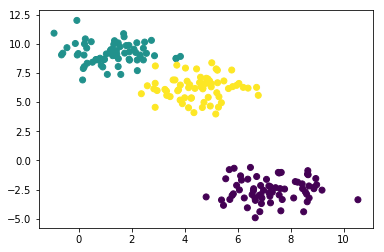

In [20]:
X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=32)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [21]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.ix[:, 'Alcohol':] # Split off features

/Users/gundeepsingh/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [23]:
X_train.shape
np.array_equal(y_train[0],y_train[15])

True

In [26]:
# three different scatter series so the class labels in the legend are distinct
plt.scatter(X_train[0,1], X[0,2], label='Class 1', c='red')
plt.scatter(X_train[1,1], X[1,2], label='Class 2', c='blue')
plt.scatter(X_train[15,1], X[15,2], label='Class 3', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

# display
plt.show()

KeyError: (0, 2)

In [ ]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

In [33]:
type(X[y==2]['Ash'])

pandas.core.series.Series

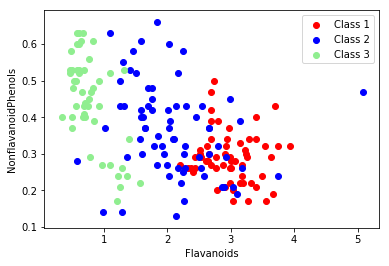

In [14]:
# three different scatter series so the class labels in the legend are distinct
plt.scatter(X[y==1]['Flavanoids'], X[y==1]['NonflavanoidPhenols'], label='Class 1', c='red')
plt.scatter(X[y==2]['Flavanoids'], X[y==2]['NonflavanoidPhenols'], label='Class 2', c='blue')
plt.scatter(X[y==3]['Flavanoids'], X[y==3]['NonflavanoidPhenols'], label='Class 3', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('Flavanoids')
plt.ylabel('NonflavanoidPhenols')

# display
plt.show()

In [48]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
print('shape of final embeddings:%s',)
print(final_embeddings.shape)
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])
print('shape of two_d_embeddings:',)
print(two_d_embeddings.shape)

def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  pylab.show()

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

ValueError: LinearDiscriminantAnalysis expects at least 2 samples provided in a 2 dimensional array-like input

In [ ]:
# feed the features to neural network
from tensorflow.contrib.keras import models
from tensorflow.contrib.keras import layers
from tensorflow.contrib.keras import applications
from tensorflow.contrib.keras import preprocessing

